<a href="https://colab.research.google.com/github/FlamingoLindo/UMC-Age-of-Empires-2/blob/main/teste_age_of_empires.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports das bibliotecas necessárias para o projeto

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.inspection import permutation_importance

# Importação do dataset diretamente do repositório do projeto

O dataset utilizado nesse projeto foi obtido no site Kaggle, criado pelo usuário Nico Elbert:
https://www.kaggle.com/datasets/nicoelbert/aoe-matchups?resource=download

In [21]:
file_path = 'https://raw.githubusercontent.com/FlamingoLindo/UMC-Age-of-Empires-2/main/aoe_data.csv'
df = pd.read_csv(file_path)
df.head()

,Unnamed: 0,match_id,map,map_size,duration,dataset,difficulty,elo,p1_civ,p2_civ,p1_xpos,p2_xpos,p1_ypos,p2_ypos,winner
0,50453403,50453403,Arabia,Tiny,3445,Definitive Edition,Hardest,1104.0,Vikings,Mayans,92.0,24.0,37.0,78.0,0
1,118982970,118982970,Arena,Tiny,2932,Definitive Edition,Hardest,884.5,Britons,Goths,70.0,82.0,16.0,98.0,0
2,57185801,57185801,Arena,Tiny,2573,Definitive Edition,Hardest,905.5,Chinese,Malians,69.0,61.0,16.0,104.0,0
3,64335748,64335748,Arabia,Tiny,851,Definitive Edition,Hardest,1080.0,Mayans,Magyars,25.0,98.0,80.0,68.0,1
4,116883036,116883036,Arabia,Tiny,4737,Definitive Edition,Hardest,1050.0,Berbers,Slavs,83.0,30.0,28.0,85.0,1


# Análise de valores unícos do dataset

In [22]:
colunas = df.columns

for nome_coluna in colunas:
    unique_values = df[nome_coluna].unique()
    unique_qnt = df[nome_coluna].nunique()
    print(f'Valores unícos em {nome_coluna}: {unique_values}')
    print(f'Quantidade de valores unicos {unique_qnt} \n')

Valores unícos em Unnamed: 0: [ 50453403 118982970  57185801 ... 124942713 141486159 139998132]
Quantidade de valores unicos 224599 

Valores unícos em match_id: [ 50453403 118982970  57185801 ... 124942713 141486159 139998132]
Quantidade de valores unicos 224599 

Valores unícos em map: ['Arabia' 'Arena' 'Four Lakes' 'Steppe' 'Golden Pit' 'African Clearing'
 'Serengeti' 'Nomad' 'MegaRandom' 'Coastal Forest' 'Atacama' 'Acropolis'
 'Golden Swamp' 'Gold Rush' 'Aftermath' 'Socotra' 'Hideout' 'Valley'
 'Water Nomad' 'Mongolia' 'Ghost Lake' 'Baltic' 'Marketplace'
 'Archipelago' 'Runestones' 'Islands' 'Crater' 'Mediterranean'
 'Land Nomad' 'Migration' 'Team Islands' 'Wade' 'Land Madness' 'Lowland'
 'Fortress' 'Seize the Mountain' 'Greenland' 'Lombardia' 'Hill Fort'
 'Haboob' 'Volcanic Island' 'Yucatan' 'Cenotes' 'Coastal' 'Northern Isles']
Quantidade de valores unicos 45 

Valores unícos em map_size: ['Tiny']
Quantidade de valores unicos 1 

Valores unícos em duration: [3445 2932 2573 ... 59

# Remoção de colunas não necessárias

In [23]:
df.drop(['Unnamed: 0', 'match_id', 'map_size', 'dataset', 'difficulty'], axis=1, inplace=True)
df.head()

,map,duration,elo,p1_civ,p2_civ,p1_xpos,p2_xpos,p1_ypos,p2_ypos,winner
0,Arabia,3445,1104.0,Vikings,Mayans,92.0,24.0,37.0,78.0,0
1,Arena,2932,884.5,Britons,Goths,70.0,82.0,16.0,98.0,0
2,Arena,2573,905.5,Chinese,Malians,69.0,61.0,16.0,104.0,0
3,Arabia,851,1080.0,Mayans,Magyars,25.0,98.0,80.0,68.0,1
4,Arabia,4737,1050.0,Berbers,Slavs,83.0,30.0,28.0,85.0,1


# Valores nulos no dataset

In [24]:
df.isna().sum()

map             0
duration        0
elo             0
p1_civ          0
p2_civ          0
p1_xpos     10596
p2_xpos     10596
p1_ypos     10596
p2_ypos     10596
winner          0
dtype: int64

Aqui é possivel ver que existem "10596" valores como "NaN" nas colunas de coordenadas iniciais dos jogadores.

## Pode-se optar por remover todas as linhas que contem valores com "NaN" ou fazer a média dos valores existentes e então substiruir os não existentes pela média:

In [25]:

#Caso queira utilizar a média das cooredenas ao invés de apenas remover as linhas
#com NaN

# Média p1_xpos
# med_p1x = df['p1_xpos'].mean()
# df['p1_xpos'].fillna(med_p1x, inplace=True)

# # Média p2_xpos
# med_p2x = df['p2_xpos'].mean()
# df['p2_xpos'].fillna(med_p2x, inplace=True)

# # Média p1_ypos
# med_p1y = df['p1_ypos'].mean()
# df['p1_ypos'].fillna(med_p1y, inplace=True)


# # Média p2_ypos
# med_p2y = df['p2_ypos'].mean()
# df['p2_ypos'].fillna(med_p2y, inplace=True)

df.dropna(inplace=True)
df.isna().sum()
print(df)

           map  duration     elo      p1_civ      p2_civ  p1_xpos  p2_xpos  \
0       Arabia      3445  1104.0     Vikings      Mayans     92.0     24.0   
1        Arena      2932   884.5     Britons       Goths     70.0     82.0   
2        Arena      2573   905.5     Chinese     Malians     69.0     61.0   
3       Arabia       851  1080.0      Mayans     Magyars     25.0     98.0   
4       Arabia      4737  1050.0     Berbers       Slavs     83.0     30.0   
...        ...       ...     ...         ...         ...      ...      ...   
224593   Arena      2917   992.0       Goths       Khmer     53.0     63.0   
224594  Arabia      2525  1540.0     Mongols  Byzantines     19.0     98.0   
224596  Arabia      4243   870.5  Bulgarians  Ethiopians    101.0     40.0   
224597  Arabia      3280  1234.5       Turks     Indians     24.0     99.0   
224598  Arabia      2506  1432.0     Vikings       Slavs     75.0     37.0   

        p1_ypos  p2_ypos  winner  
0          37.0     78.0    

# Remoção de linhas para que o treinamento ocorra mas rápido

In [26]:
df = df.sample(350)
print(df)

                 map  duration     elo       p1_civ      p2_civ  p1_xpos  \
27385         Arabia      3198  1433.5      Vikings  Bulgarians     21.0   
211307        Arabia      4290  1315.0       Mayans     Chinese     50.0   
196914        Arabia      1849  1246.0  Burgundians       Turks     99.0   
9693            Wade      1585  1577.0   Bulgarians     Mongols     88.0   
111971        Arabia      2316  1054.5       Franks      Franks     27.0   
...              ...       ...     ...          ...         ...      ...   
57590   Golden Swamp      1232   856.0   Portuguese     Chinese     23.0   
109060     Acropolis      1812  1383.5         Huns        Huns     66.0   
75832         Arabia      2357  1257.5      Vikings      Franks     21.0   
141806        Arabia      2907   933.5       Tatars      Franks     84.0   
31739         Arabia      3797  1123.0      Indians      Franks     89.0   

        p2_xpos  p1_ypos  p2_ypos  winner  
27385      98.0     69.0     63.0       0  

# Tipos de encoding para colunas categóricas

## Label encoding

In [27]:

le_map = LabelEncoder()
df['map_encoded'] = le_map.fit_transform(df['map'])

le_civ = LabelEncoder()

df['p1_civ_encoded'] = le_civ.fit_transform(df['p1_civ'])
le_civ2 = LabelEncoder()

df['p2_civ_encoded'] = le_civ2.fit_transform(df['p2_civ'])
df.head()

,map,duration,elo,p1_civ,p2_civ,p1_xpos,p2_xpos,p1_ypos,p2_ypos,winner,map_encoded,p1_civ_encoded,p2_civ_encoded
27385,Arabia,3198,1433.5,Vikings,Bulgarians,21.0,98.0,69.0,63.0,0,2,38,4
211307,Arabia,4290,1315.0,Mayans,Chinese,50.0,60.0,21.0,99.0,1,2,25,9
196914,Arabia,1849,1246.0,Burgundians,Turks,99.0,20.0,56.0,67.0,0,2,5,34
9693,Wade,1585,1577.0,Bulgarians,Mongols,88.0,35.0,88.0,28.0,1,27,4,24
111971,Arabia,2316,1054.5,Franks,Franks,27.0,92.0,36.0,36.0,1,2,12,12


## One hot

In [28]:
# one_map = OneHotEncoder(handle_unknown='ignore', sparse_output=False).set_output(transform='pandas')
# map_transformed = one_map.fit_transform(df[['map']])


# one_civ1 = OneHotEncoder(handle_unknown='ignore', sparse_output=False).set_output(transform='pandas')
# civ1_transformed = one_civ1.fit_transform(df[['p1_civ']])


# one_civ2 = OneHotEncoder(handle_unknown='ignore', sparse_output=False).set_output(transform='pandas')
# civ2_transformed = one_civ2.fit_transform(df[['p2_civ']])

# # Adicionar map_transformed se usar ele com onehot
# df = pd.concat([df, civ1_transformed, civ2_transformed, map_transformed], axis=1)
# df.head()

# Remoção de colunas categoricas

In [29]:
df.drop(['map', 'p1_civ', 'p2_civ'], axis=1, inplace=True)
df.head()

,duration,elo,p1_xpos,p2_xpos,p1_ypos,p2_ypos,winner,map_encoded,p1_civ_encoded,p2_civ_encoded
27385,3198,1433.5,21.0,98.0,69.0,63.0,0,2,38,4
211307,4290,1315.0,50.0,60.0,21.0,99.0,1,2,25,9
196914,1849,1246.0,99.0,20.0,56.0,67.0,0,2,5,34
9693,1585,1577.0,88.0,35.0,88.0,28.0,1,27,4,24
111971,2316,1054.5,27.0,92.0,36.0,36.0,1,2,12,12


# Separação de dados de teste e treino (80/20)

In [30]:
X = df.drop('winner', axis=1)
y = df['winner']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Treino do modelo SVC com kernal linear e matriz de confusão

In [31]:
model = SVC()
model.fit(X_train_scaled, y_train)

SVC()

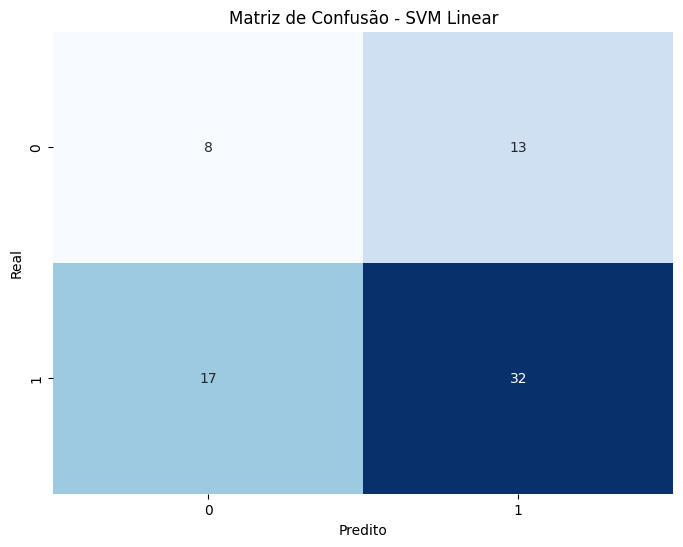

              precision    recall  f1-score   support

           0       0.32      0.38      0.35        21
           1       0.71      0.65      0.68        49

    accuracy                           0.57        70
   macro avg       0.52      0.52      0.51        70
weighted avg       0.59      0.57      0.58        70



In [32]:
y_pred = model.predict(X_test_scaled)
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusão - SVM Linear')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.show()
print(classification_report(y_test, y_pred))

# Treino do modelo com diferentes valores para C, Gamma e Kernels e os melhores parâmetros

In [33]:
svm = SVC(probability=True)
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear', 'poly']
}

# Instanciar o modelo SVM
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)


GridSearchCV(cv=5, estimator=SVC(probability=True),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'linear', 'poly']},
             scoring='accuracy')

In [34]:
print('Melhores parâmetros: ', grid_search.best_params_)
print('Melhor estimador: ', grid_search.best_estimator_)

Melhores parâmetros:  {'C': 10, 'gamma': 0.1, 'kernel': 'poly'}
Melhor estimador:  SVC(C=10, gamma=0.1, kernel='poly', probability=True)


In [35]:
best_svm = grid_search.best_estimator_
y_pred = best_svm.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.57
Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.43      0.38        21
           1       0.72      0.63      0.67        49

    accuracy                           0.57        70
   macro avg       0.53      0.53      0.52        70
weighted avg       0.60      0.57      0.58        70



## Matriz do treino com os melhores parâmetros

<Figure size 640x480 with 0 Axes>

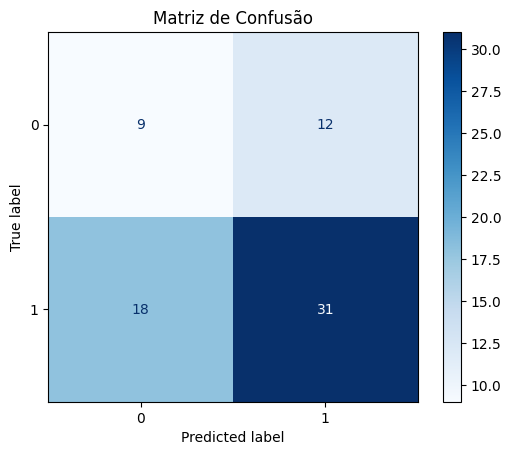

In [36]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
plt.figure()
disp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusão')
plt.show()

# Permutação

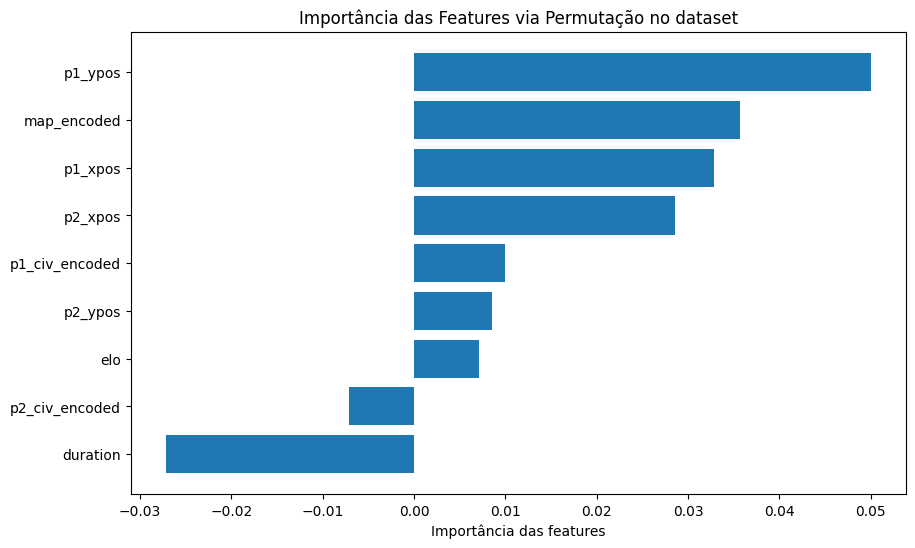

In [37]:
result = permutation_importance(best_svm, X_test_scaled, y_test, n_repeats=10, random_state=42)
sorted_idx = result.importances_mean.argsort()
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), result.importances_mean[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [X.columns[i] for i in sorted_idx])
plt.xlabel('Importância das features')
plt.title('Importância das Features via Permutação no dataset')
plt.show()

## Análise das features

In [38]:
fp_indices = np.where((y_pred == 1) & (y_test != 1))[0]
fn_indices = np.where((y_pred != 1) & (y_test == 1))[0]
fp_samples = X_test.iloc[fp_indices]
fn_samples = X_test.iloc[fn_indices]
correctly_classified_samples = X_test[(y_pred == y_test)]
fp_mean = fp_samples.mean()
fn_mean = fn_samples.mean()
correctly_classified_mean = correctly_classified_samples.mean()
comparison_df = pd.DataFrame({
    'Falsos positivos': fp_mean,
    'Falsos Negativos': fn_mean,
    'Classificados corretamente': correctly_classified_mean
})
print('Comparação das Features (Médias):')
print(comparison_df)

Comparação das Features (Médias):
                Falsos positivos  Falsos Negativos  Classificados corretamente
duration             2243.833333       2142.166667                   2374.4500
elo                  1063.541667       1282.305556                   1128.5375
p1_xpos                64.166667         56.611111                     62.2000
p2_xpos                46.166667         59.722222                     56.5500
p1_ypos                58.000000         60.777778                     56.7250
p2_ypos                66.500000         57.611111                     55.9750
map_encoded             3.500000          6.000000                      5.6500
p1_civ_encoded         20.750000         15.500000                     18.7500
p2_civ_encoded         10.000000         21.500000                     15.4000
